In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
import requests

x = requests.get('https://tylervigen.com/view_correlation?id=3890')
print(x.status_code)

200


In [3]:
soup = BeautifulSoup(x.text)
print(soup.prettify())

<html>
 <head>
  <link href="correlate.png" rel="image_src"/>
  <meta content="Per capita consumption of mozzarella cheese (US) correlates with Civil engineering doctorates awarded (US)" name="title"/>
  <meta content="Can you come up with a causal mechanism?" name="description"/>
  <title>
   Per capita consumption of mozzarella cheese (US) correlates with Civil engineering doctorates awarded (US)
  </title>
  <style type="text/css">
   table {
border-spacing: 0px;
border-color: gray;
}
a:link    {color:79c000;text-decoration:none;}
a:visited {color:79c000;text-decoration:none;}
a:hover   {color:0079c0;text-decoration:none;}
a:active  {color:79c000;text-decoration:none;}
.variable{
	font-size: 24px;
	font-weight:bold;
	color:0079C0;
}
a.variable:link    {color:0079C0;text-decoration:none;}
a.variable:visited {color:0079C0;text-decoration:none;}
a.variable:hover   {color:79c000;text-decoration:none;}
a.variable:active  {color:0079C0;text-decoration:none;}
.title{
	font-size: 28px;
	fon

In [6]:
t = []
for tr in soup.find_all('tr')[2]:
    td = tr.find_all('td')
    for i, v in enumerate(list(td)):
        if td[i].text != '':
            t.append(td[i].text)   

In [7]:
print(t)

['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', 'Per capita consumption of mozzarella cheese (US)Pounds (USDA)', '9.3', '9.7', '9.7', '9.7', '9.9', '10.2', '10.5', '11', '10.6', '10.6', 'Civil engineering doctorates awarded (US)Degrees awarded (National Science Foundation)', '480', '501', '540', '552', '547', '622', '655', '701', '712', '708', 'Correlation: 0.958648']


In [10]:
ind = t[:10]
consumption = t[11:21]
award = t[22:32]
lab1 = 'Per capita consumption of mozzarella cheese (US)'
lab2 = 'Civil engineering doctorates awarded (US)'

In [11]:
import pandas as pd

In [12]:
df = pd.DataFrame({'Consumption': consumption, 'Award': award}, index = ind)

In [13]:
import numpy as np
import matplotlib.pyplot as plt


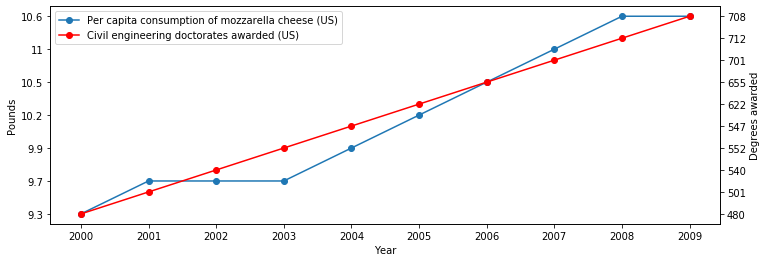

In [25]:
fig,ax1 = plt.subplots(figsize = (12,4))
ln1 = ax1.plot(df.Consumption, label = lab1, marker = 'o')
ax1.set_xlabel('Year')
ax1.set_ylabel('Pounds')
#plt.legend(loc = 'upper left',bbox_to_anchor=(0, 0.5, 0.5, 0.5), fontsize = 'medium')

ax2 = ax1.twinx()
ln2 = ax2.plot(df.Award, label = lab2,marker = 'o', color = 'r')
ax2.set_ylabel('Degrees awarded')
#plt.legend(loc = 'upper left', bbox_to_anchor=(0, 0.4, 0.5, 0.5),fontsize = 'medium')
lns = ln1 + ln2
lab = [l.get_label() for l in lns]
ax2.legend(lns, lab, loc = 'upper left')

plt.show()